In [69]:

# 1. Install & Import Libraries
!pip install kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

In [70]:


# 2. Load Dataset

files.upload()  # Upload kaggle.json when prompted

# Load dataset
df = pd.read_csv('heartt.csv')
print("Training set shape:", df.shape)

print("✅ Dataset Loaded Successfully!")
df.head()


Saving heartt.csv to heartt (5).csv
Training set shape: (918, 12)
✅ Dataset Loaded Successfully!


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [71]:
# SAVE before cleaning

df.to_csv("before_cleaned.csv", index=False)
files.download("before_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:

# 3. Data Cleaning & Preprocessing

print("\n🔹 Basic Info:")
df.info()

print("\n🔹 Missing Values:")
print(df.isnull().sum())

print("\n🔹 Dataset Description:")
print(df.describe())


# Drop duplicates if any

df.drop_duplicates(inplace=True)



🔹 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

🔹 Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
Exercise

In [73]:

# 4 Select ONLY required columns

# Goal-specific features
features = ["Age", "Cholesterol", "ChestPainType"]
target = "HeartDisease"

df = df[features + [target]]

In [74]:

# SAVE after cleaning

df.to_csv("after_cleaned.csv", index=False)
files.download("after_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🔹 Correlation matrix (numeric features):


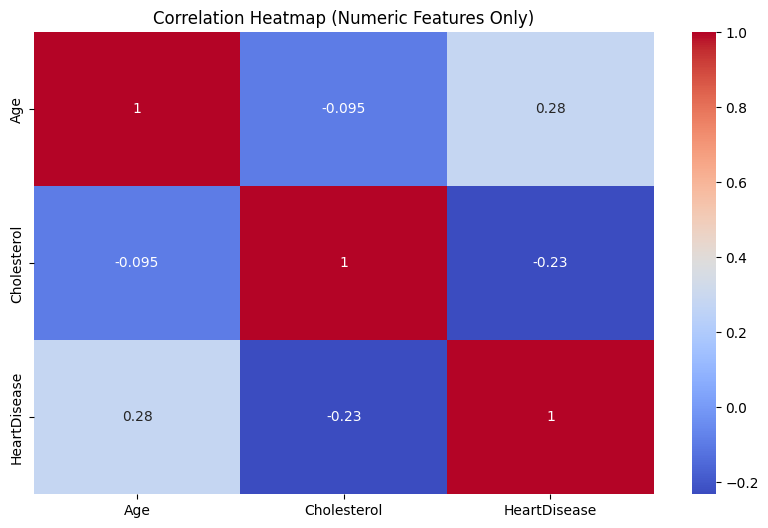


🔹 Age distribution by HeartDisease:
              count       mean       std   min   25%   50%   75%   max
HeartDisease                                                          
0             410.0  50.551220  9.444915  28.0  43.0  51.0  57.0  76.0
1             508.0  55.899606  8.727056  31.0  51.0  57.0  62.0  77.0


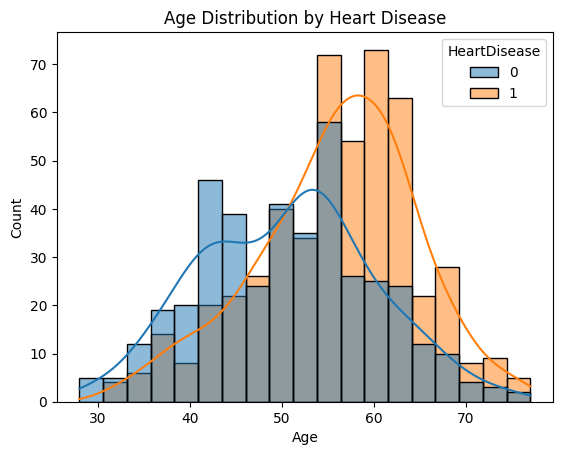


🔹 ChestPainType counts by HeartDisease:

 ChestPainType Encoding: {'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}
HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20


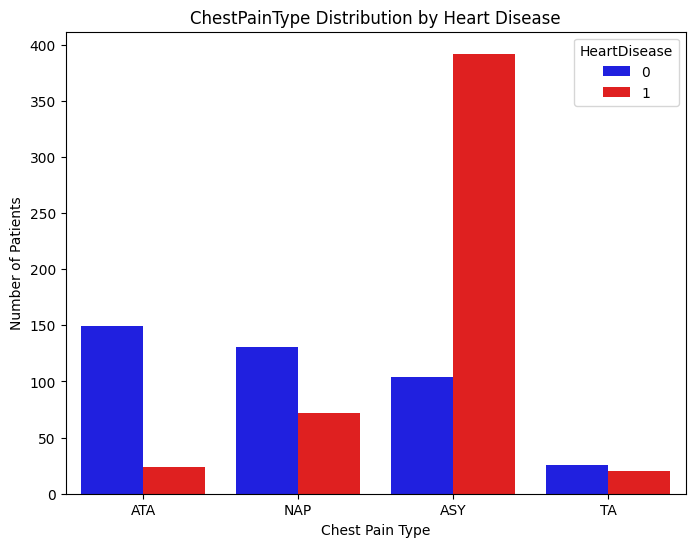


🔹 Cholesterol distribution by HeartDisease:
              count        mean         std  min     25%    50%     75%    max
HeartDisease                                                                  
0             410.0  227.121951   74.634659  0.0  197.25  227.0  266.75  564.0
1             508.0  175.940945  126.391398  0.0    0.00  217.0  267.00  603.0


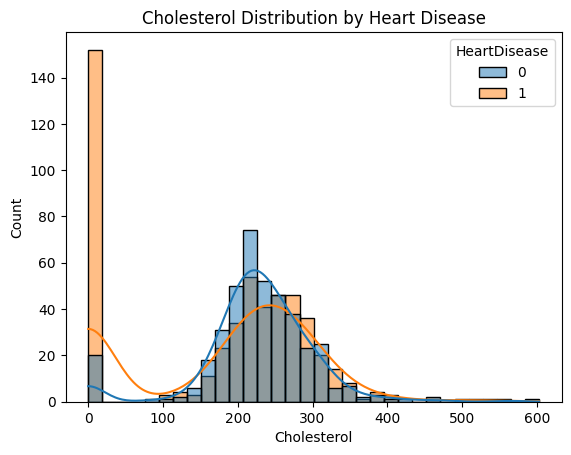

In [75]:

# 5 Correlation (numeric features)


numeric_df = df.select_dtypes(include=['number'])
print("\n🔹 Correlation matrix (numeric features):")

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


# 6. Age distribution

print("\n🔹 Age distribution by HeartDisease:")
print(df.groupby('HeartDisease')['Age'].describe())

sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True)
plt.title('Age Distribution by Heart Disease')
plt.show()



# 7. ChestPainType distribution

print("\n🔹 ChestPainType counts by HeartDisease:")
print("\n ChestPainType Encoding: {'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}")
print(pd.crosstab(df['ChestPainType'], df['HeartDisease']))

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette={0:'blue', 1:'red'})
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of Patients")
plt.title("ChestPainType Distribution by Heart Disease")
plt.show()



# 8. Cholesterol distribution

print("\n🔹 Cholesterol distribution by HeartDisease:")
print(df.groupby('HeartDisease')['Cholesterol'].describe())

sns.histplot(data=df, x='Cholesterol', hue='HeartDisease', kde=True)
plt.title('Cholesterol Distribution by Heart Disease')
plt.show()

In [76]:
# 9. Separate features (X) and target (y)

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Encode categorical (non-numeric) columns
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])


# 10. Train–Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create CSVs for train and test
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)


# 11. Train Random Forest Model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

✅ Model trained successfully!


In [77]:
# DOWNLOAD train.csv separately

train_df.to_csv("train.csv", index=False)
print("🔹 Downloading train.csv...")
files.download("train.csv")

🔹 Downloading train.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:

# DOWNLOAD test.csv separately

test_df.to_csv("test.csv", index=False)
print("🔹 Downloading test.csv...")
files.download("test.csv")

🔹 Downloading test.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Model Evaluation:
Accuracy: 0.717

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.74      0.69        77
           1       0.79      0.70      0.74       107

    accuracy                           0.72       184
   macro avg       0.71      0.72      0.71       184
weighted avg       0.73      0.72      0.72       184



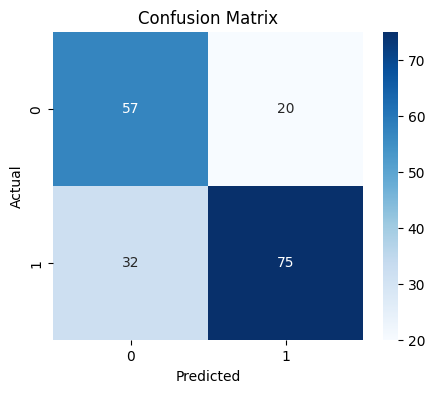

In [79]:

# 12. Model Evaluation


print("\n✅ Model Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

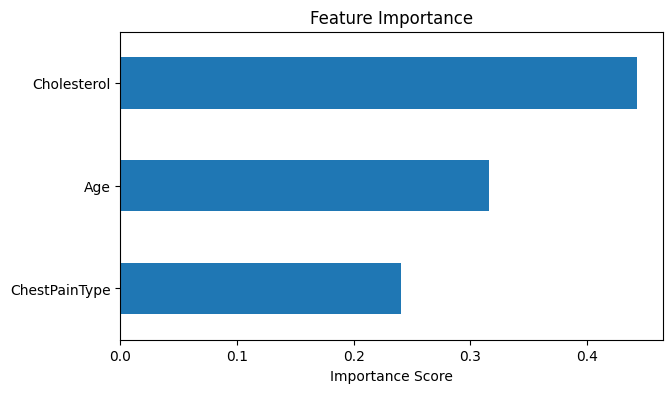

In [80]:

# 13. Feature Importance

importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind="barh", figsize=(7,4))
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()

In [81]:

# 14. Conclusion

print("""
📘 Conclusion:
- The Random Forest model achieved good predictive accuracy on this dataset.
- Important factors influencing heart disease likely include Age, Chest Pain Type, and Cholesterol.
- As we observed from the output and when we compared Age, Chest Pain Type, and Cholesterol to predict heart disease.
- Random Forest achieved good accuracy.
- Important factors: Age, Chest Pain Type, Cholesterol.
- Most influential: Cholesterol > Age > ChestPainType.
- Performance can be improved using GridSearchCV or other models.
""")



📘 Conclusion:
- The Random Forest model achieved good predictive accuracy on this dataset.
- Important factors influencing heart disease likely include Age, Chest Pain Type, and Cholesterol.
- As we observed from the output and when we compared Age, Chest Pain Type, and Cholesterol to predict heart disease.
- Random Forest achieved good accuracy.
- Important factors: Age, Chest Pain Type, Cholesterol.
- Most influential: Cholesterol > Age > ChestPainType.
- Performance can be improved using GridSearchCV or other models.

